In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [3]:
test = pd.read_csv('testData.txt', sep=',')
train = pd.read_csv('trainData.txt', sep=',')

In [4]:
test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [5]:
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
train.shape

(8143, 7)

In [7]:
test.shape

(9752, 7)

#### (a) State the number of training samples. Also, state the number of test samples.
- The number of training samples = 8,143 records
- The number of testing samples = 9,752 records

In [149]:
X = train.iloc[:8000, 1:6]
Y = test.iloc[:8000, -1:]

In [150]:
X.shape

(8000, 5)

In [151]:
Y.shape

(8000, 1)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### (b) Run a simulation using TensorFlow and vary the number of hidden units and make a plot.

In [170]:
model = tf.keras.Sequential()
#model.add(tf.keras.Input(shape=(5, )))
model.add(tf.keras.layers.Dense(32, activation='softplus',input_shape=(5, ))) #Input layer
model.add(tf.keras.layers.Dense(64, activation='softplus')) #Hidden Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #Output layer

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                192       
                                                                 
 dense_73 (Dense)            (None, 64)                2112      
                                                                 
 dense_74 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [171]:
#loss_fn = tf.keras.losses.binary_focal_crossentropy()
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [172]:
fit_model = model.fit(x_train, y_train, epochs=10, validation_split=0.3, steps_per_epoch=100)

Epoch 1/10
100/100 [==============================] - 2s 9ms/step - loss: 1.1252 - accuracy: 0.7951 - val_loss: 0.7520 - val_accuracy: 0.6755
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.8500 - val_loss: 0.4753 - val_accuracy: 0.8375
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.8348 - val_loss: 0.3333 - val_accuracy: 0.8552
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 0.3645 - accuracy: 0.8647 - val_loss: 0.2996 - val_accuracy: 0.8906
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.4106 - accuracy: 0.8565 - val_loss: 0.4671 - val_accuracy: 0.8495
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8538 - val_loss: 0.4052 - val_accuracy: 0.8625
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.8549 - val_loss: 0.3387 - val_accuracy: 0.8760
Epoch 

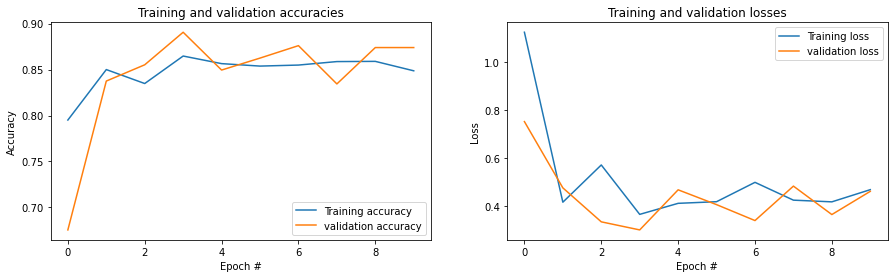

In [173]:
#Plot the model accuracy metrics

fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.legend(['Training accuracy', 'validation accuracy'])
plt.title('Training and validation accuracies')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')


fig.add_subplot(122)
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.legend(['Training loss', 'validation loss'])
plt.title('Training and validation losses')
plt.xlabel('Epoch #')
plt.ylabel('Loss');

In [174]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'\nclassification accuracy on training data: {train_acc*100:.2f}%')
print(f'classification accuracy on test data: {test_acc*100:.2f}%')
print(f'classification loss on training data: {train_loss:.3f}')
print(f'classification loss on test data: {test_loss:.3f}')

50/50 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.8656

classification accuracy on training data: 87.30%
classification accuracy on test data: 86.56%
classification loss on training data: 0.440
classification loss on test data: 0.459


50/50 [==============================] - 0s 2ms/step


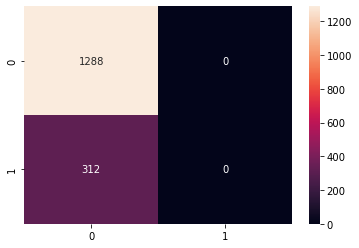

In [175]:
predict = model.predict(x_test)
test_predict_labels = np.argmax(predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= y_test, predictions=test_predict_labels)
sb.heatmap(data= confusion_matrix, annot=True, fmt='g');

#### (c) Discuss (interpret) the results

- The model acheived an 87.30% training accuracy and 86.56% testing accuracy on the training data.
- The model runs with only one hidden layer with 64 nodes. The optimizer is Adam while the loss function is binary cross entropy.
- The architecture is 5-h1-1
- The training and validation accuracy and loss curves show that the training and validation was not very smooth and consistent hence the model can still be improved to perform better.

#### (d) Add a second hidden layer, and train a few architectures with 2 hidden layers. 
- Report what architectures you tried (expressed as 5-h1-h2-1, i.e., 5 input, h1 hidden in first layer, h2 hidden in second layer, and one output unit)

In [182]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(32, activation='softplus',input_shape=(5, ))) #Input layer
model2.add(tf.keras.layers.Dense(64, activation='softplus')) #Hidden Layer
model2.add(tf.keras.layers.Dense(64, activation='softplus')) #Hidden Layer
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #Output layer

model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 32)                192       
                                                                 
 dense_80 (Dense)            (None, 64)                2112      
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 dense_82 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [183]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)


loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.0, axis=-1, reduction="auto", name="binary_crossentropy")

model2.compile(optimizer= opt, loss= loss_fn, metrics=['accuracy'])

In [184]:
fitted_model = model2.fit(x_train, y_train, epochs=10, validation_split=0.3, steps_per_epoch=100)

Epoch 1/10


C:\Users\Nonny\anaconda3\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 96/100 [===========================>..] - ETA: 0s - loss: 2.9802 - accuracy: 0.7780

C:\Users\Nonny\anaconda3\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


100/100 [==============================] - 2s 8ms/step - loss: 2.8873 - accuracy: 0.7812 - val_loss: 0.3632 - val_accuracy: 0.8464
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8482 - val_loss: 0.4425 - val_accuracy: 0.8464
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.8612 - val_loss: 0.3333 - val_accuracy: 0.8646
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.8603 - val_loss: 0.2949 - val_accuracy: 0.8609
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8621 - val_loss: 0.2880 - val_accuracy: 0.8734
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.8712 - val_loss: 0.3024 - val_accuracy: 0.8818
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.8712 - val_loss: 0.2914 - val_accuracy: 0.8719
Epoch 8/10
100/10

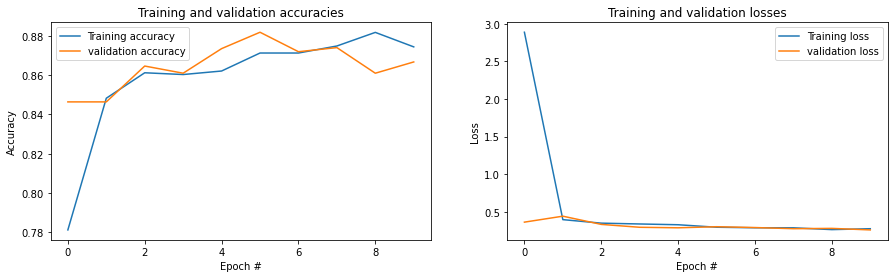

In [185]:
#Plot the model accuracy metrics

fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.legend(['Training accuracy', 'validation accuracy'])
plt.title('Training and validation accuracies')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')


fig.add_subplot(122)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.legend(['Training loss', 'validation loss'])
plt.title('Training and validation losses')
plt.xlabel('Epoch #')
plt.ylabel('Loss');

In [186]:
train_loss1, train_acc1 = model2.evaluate(x_train, y_train)
test_loss1, test_acc1 = model2.evaluate(x_test, y_test)

print(f'\nclassification accuracy on training data: {train_acc1*100:.2f}%')
print(f'classification accuracy on test data: {test_acc1*100:.2f}%')
print(f'classification loss on training data: {train_loss1:.3f}')
print(f'classification loss on test data: {test_loss1:.3f}')

50/50 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.8669

classification accuracy on training data: 87.33%
classification accuracy on test data: 86.69%
classification loss on training data: 0.249
classification loss on test data: 0.264


50/50 [==============================] - 0s 2ms/step


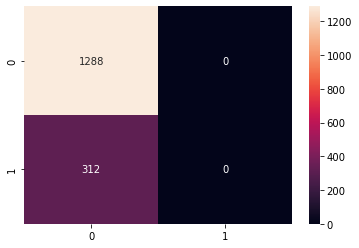

In [187]:
prediction = model2.predict(x_test)
test_predict_labels1 = np.argmax(prediction, axis = 1)
confusion_matrix1 = tf.math.confusion_matrix(labels= y_test, predictions=test_predict_labels1)
sb.heatmap(data= confusion_matrix1, annot=True, fmt='g');

####  Report what architectures you tried (expressed as 5-h1-h2-1, i.e., 5 input, h1 hidden in first layer, h2 hidden in second layer, and one output unit)



- The architecture is 5-h1-h2-1
- The model acheived an 87.33% training accuracy and 86.66% testing accuracy on the training data which is a slight increase from the previous model.
- The model uses softplus activation function in the hidden layers and sigmoid activation function in the output layer. The optimizer is Adam while the loss function is binary cross entropy.
- While the model converges after a few iterations, I still believe that the model can still be improved to perform better and converge optimally.